In [1]:
import wget
import os
import json

In [2]:
kp2017_train_file = 'annotations/person_keypoints_train2017.json'
kp2017_val_file = 'annotations/person_keypoints_val2017.json'

In [4]:
with open(kp2017_val_file) as file:
    data = json.load(file)

In [5]:
data.keys()

dict_keys(['info', 'licenses', 'images', 'annotations', 'categories'])

In [6]:
images = data.get('images')

In [7]:
len(images)

5000

In [8]:
images[0]

{'license': 4,
 'file_name': '000000397133.jpg',
 'coco_url': 'http://images.cocodataset.org/val2017/000000397133.jpg',
 'height': 427,
 'width': 640,
 'date_captured': '2013-11-14 17:02:52',
 'flickr_url': 'http://farm7.staticflickr.com/6116/6255196340_da26cf2c9e_z.jpg',
 'id': 397133}

In [9]:
anno = data.get('annotations')
len(anno)

11004

In [10]:
anno[0]

{'segmentation': [[125.12,
   539.69,
   140.94,
   522.43,
   100.67,
   496.54,
   84.85,
   469.21,
   73.35,
   450.52,
   104.99,
   342.65,
   168.27,
   290.88,
   179.78,
   288,
   189.84,
   286.56,
   191.28,
   260.67,
   202.79,
   240.54,
   221.48,
   237.66,
   248.81,
   243.42,
   257.44,
   256.36,
   253.12,
   262.11,
   253.12,
   275.06,
   299.15,
   233.35,
   329.35,
   207.46,
   355.24,
   206.02,
   363.87,
   206.02,
   365.3,
   210.34,
   373.93,
   221.84,
   363.87,
   226.16,
   363.87,
   237.66,
   350.92,
   237.66,
   332.22,
   234.79,
   314.97,
   249.17,
   271.82,
   313.89,
   253.12,
   326.83,
   227.24,
   352.72,
   214.29,
   357.03,
   212.85,
   372.85,
   208.54,
   395.87,
   228.67,
   414.56,
   245.93,
   421.75,
   266.07,
   424.63,
   276.13,
   437.57,
   266.07,
   450.52,
   284.76,
   464.9,
   286.2,
   479.28,
   291.96,
   489.35,
   310.65,
   512.36,
   284.76,
   549.75,
   244.49,
   522.43,
   215.73,
   546.88,
  

In [11]:
categories = data['categories']
print(categories)

[{'supercategory': 'person', 'id': 1, 'name': 'person', 'keypoints': ['nose', 'left_eye', 'right_eye', 'left_ear', 'right_ear', 'left_shoulder', 'right_shoulder', 'left_elbow', 'right_elbow', 'left_wrist', 'right_wrist', 'left_hip', 'right_hip', 'left_knee', 'right_knee', 'left_ankle', 'right_ankle'], 'skeleton': [[16, 14], [14, 12], [17, 15], [15, 13], [12, 13], [6, 12], [7, 13], [6, 7], [6, 8], [7, 9], [8, 10], [9, 11], [2, 3], [1, 2], [1, 3], [2, 4], [3, 5], [4, 6], [5, 7]]}]


In [29]:
images.sort(key = lambda img:img['id'])
anno.sort(key = lambda ann: ann['image_id'])

In [13]:
print(images[0]['id'])
print(images[-1]['id'])

139
581781


In [14]:
wget.download(images[-1]['coco_url'])

'000000581781 (1).jpg'

In [31]:
print(anno[0]['image_id'])
print(anno[-1]['image_id'])

139
581357


In [36]:
anno[0]['keypoints']

[427,
 170,
 1,
 429,
 169,
 2,
 0,
 0,
 0,
 434,
 168,
 2,
 0,
 0,
 0,
 441,
 177,
 2,
 446,
 177,
 2,
 437,
 200,
 2,
 430,
 206,
 2,
 430,
 220,
 2,
 420,
 215,
 2,
 445,
 226,
 2,
 452,
 223,
 2,
 447,
 260,
 2,
 454,
 257,
 2,
 455,
 290,
 2,
 459,
 286,
 2]

In [38]:
categories

[{'supercategory': 'person',
  'id': 1,
  'name': 'person',
  'keypoints': ['nose',
   'left_eye',
   'right_eye',
   'left_ear',
   'right_ear',
   'left_shoulder',
   'right_shoulder',
   'left_elbow',
   'right_elbow',
   'left_wrist',
   'right_wrist',
   'left_hip',
   'right_hip',
   'left_knee',
   'right_knee',
   'left_ankle',
   'right_ankle'],
  'skeleton': [[16, 14],
   [14, 12],
   [17, 15],
   [15, 13],
   [12, 13],
   [6, 12],
   [7, 13],
   [6, 7],
   [6, 8],
   [7, 9],
   [8, 10],
   [9, 11],
   [2, 3],
   [1, 2],
   [1, 3],
   [2, 4],
   [3, 5],
   [4, 6],
   [5, 7]]}]

In [44]:
rand_img = images[1000]
for i in range(len(anno)):
    if anno[i]['image_id'] == rand_img['id']:
        print(i)

2251
2252


In [30]:
person_count = {}
x = 0
y = 0
# images and anno are 1 - N relationship
count = 0
while True:
    if images[x]['id'] == anno[y]['image_id']:
        count += 1
        y += 1
    else:
        person_count[count] = person_count.get(count, 0) + 1
        count = 0
        x += 1
    if y == len(anno):
        person_count[count] = person_count.get(count, 0) + 1
        person_count[0] = person_count.get(0, 0) + len(images) - x - 1
        break

In [23]:
import collections

In [31]:
person_count = collections.OrderedDict(sorted(person_count.items()))
person_count

OrderedDict([(0, 2307),
             (1, 1045),
             (2, 436),
             (3, 268),
             (4, 148),
             (5, 119),
             (6, 110),
             (7, 67),
             (8, 37),
             (9, 60),
             (10, 64),
             (11, 44),
             (12, 38),
             (13, 47),
             (14, 210)])

In [26]:
import matplotlib.pyplot as plt

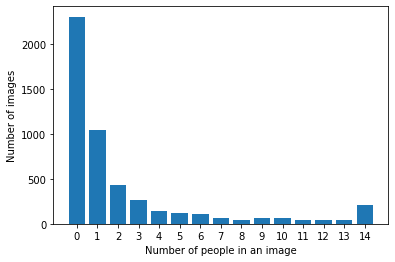

In [34]:
plt.bar(range(len(person_count)), list(person_count.values()), align='center')
plt.xticks(range(len(person_count)), list(person_count.keys()))
plt.xlabel('Number of people in an image')
plt.ylabel('Number of images')
plt.show()

In [39]:
categories[0]['keypoints']

['nose',
 'left_eye',
 'right_eye',
 'left_ear',
 'right_ear',
 'left_shoulder',
 'right_shoulder',
 'left_elbow',
 'right_elbow',
 'left_wrist',
 'right_wrist',
 'left_hip',
 'right_hip',
 'left_knee',
 'right_knee',
 'left_ankle',
 'right_ankle']

In [41]:
kp_count = {}
for i in categories[0]['keypoints']:
    kp_count[i] = 0

In [45]:
for ann in anno:
    # every third element in keypoint array indicates that whether the keypoint is detected or not
    # 0, not detected
    # 1, detected but obscured
    # 2, detected and visible 
    for i in range(17):
        if ann['keypoints'][i * 3 + 2]:
            kp_count[categories[0]['keypoints'][i]] += 1

In [46]:
kp_count

{'nose': 4268,
 'left_eye': 3703,
 'right_eye': 3685,
 'left_ear': 3185,
 'right_ear': 3256,
 'left_shoulder': 5501,
 'right_shoulder': 5495,
 'left_elbow': 4336,
 'right_elbow': 4378,
 'left_wrist': 3945,
 'right_wrist': 4012,
 'left_hip': 4755,
 'right_hip': 4784,
 'left_knee': 3513,
 'right_knee': 3500,
 'left_ankle': 2957,
 'right_ankle': 2942}